In [2]:
import numpy as np
import rebound
import matplotlib.pyplot as plt
from tqdm.auto import tqdm as tqdm_auto

In [3]:
# Create an empty simulation
sim: rebound.Simulation = rebound.Simulation()

# Set preferred units
sim.units = ('day', 'AU', 'Msun')

# Simplest Nontrivial Example - Earth Orbits the Sun

### Don't use real coordinates, just key them in by hand

In [4]:
# Add the sun
sim.add(m=1.0)
# We could have also explicitly specified that it was at rest
# sim.add(m=1.0, x=0.0, y=0.0, z=0.0, vx=0.0, vy=0.0, vz=0.0)

# Add an Earth-like planet with a=1.0 and mass, eccentricity matching Earth
sim.add(m=3.00273E-6, a=1.0, e=0.01671)

# Integrate this system for 10 years

### Save the results into Numpy arrays at daily intervals

In [5]:
# Set the number of years
n_year: int = 10

# Set the number of days (integer)
M: np.int32 = np.round(n_year*365.25).astype(np.int32)+1
# The number of particles in the simulation
N: np.int32 = np.int32(sim.N)

# Allocate position and velocity arrays
q: np.ndarray = np.zeros((M,3*N), dtype=np.float64)
v: np.ndarray = np.zeros((M,3*N), dtype=np.float64)

# Create array of times
ts = np.arange(0, M)

In [6]:
# Integrate the simulation and save the state vectors
idx = tqdm_auto(list(enumerate(ts)))
for i, t in idx:
    # Integrate to the current time step with an exact finish time
    sim.integrate(t, exact_finish_time=1)
    # Save the position
    sim.serialize_particle_data(xyz=q[i])
    # Save the velocity
    sim.serialize_particle_data(vxvyvz=v[i])

  0%|          | 0/3653 [00:00<?, ?it/s]

# Visualize the Results

In [7]:
# Array of times in years
yr = ts / 365.25

# Unpack position of Earth
jEarth = 3
qx = q[:, jEarth+0]
qy = q[:, jEarth+1]
qz = q[:, jEarth+2]

# Distance to Sun
r = np.linalg.norm(q[:, jEarth:jEarth+3], axis=1)

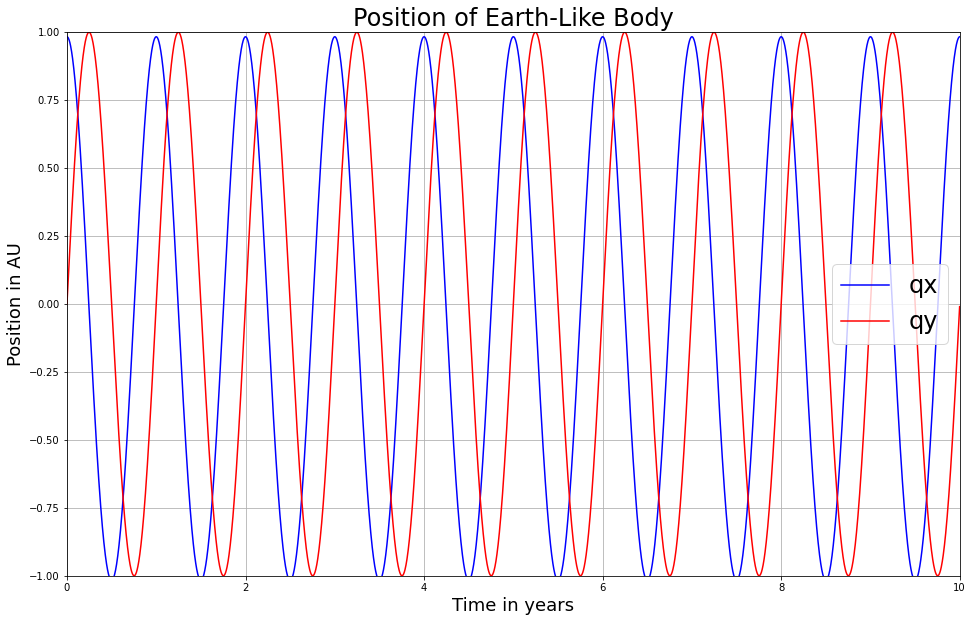

In [8]:
# Plot Earth position
fig, ax = plt.subplots(figsize=[16,10])
ax.set_title('Position of Earth-Like Body', fontsize=24)
ax.plot(yr, qx, label='qx', color='blue')
ax.plot(yr, qy, label='qy', color='red')
ax.set_xlim([0.0, 10.0])
ax.set_ylim([-1.0, 1.0])
ax.set_xlabel('Time in years', fontsize=18)
ax.set_ylabel('Position in AU', fontsize=18)
ax.grid(True)
ax.legend(fontsize=24)

plt.show()

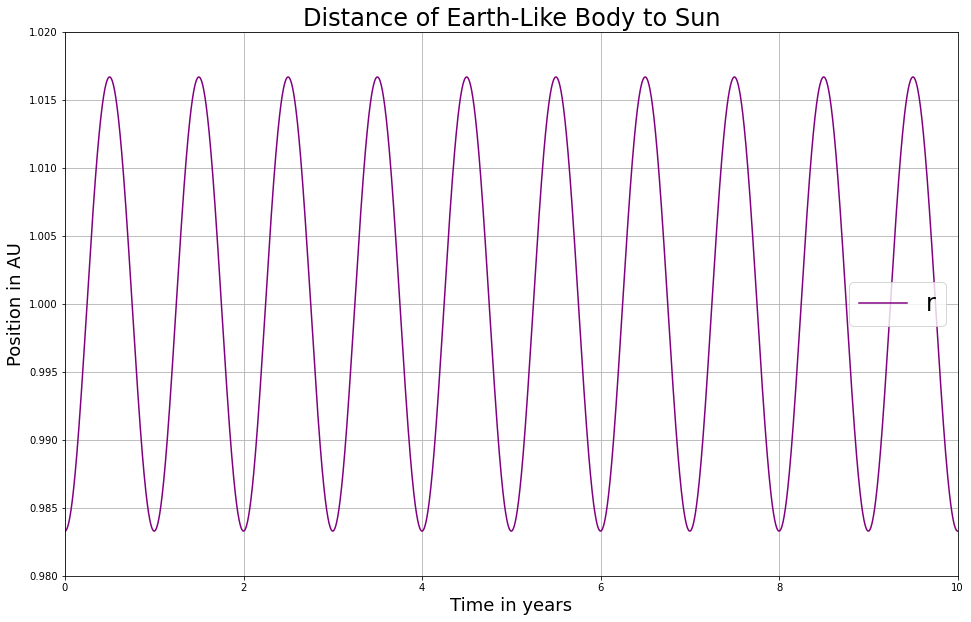

In [9]:
# Plot Earth distance to Sun
fig, ax = plt.subplots(figsize=[16,10])
ax.set_title('Distance of Earth-Like Body to Sun', fontsize=24)
ax.plot(yr, r, label='r', color='purple')
ax.set_xlim([0.0, 10.0])
ax.set_ylim([0.98, 1.02])
ax.set_xlabel('Time in years', fontsize=18)
ax.set_ylabel('Position in AU', fontsize=18)
ax.grid(True)
ax.legend(fontsize=24)

plt.show()

In [11]:
fig.savefig('figs/plot_01.png', bbox_inches='tight')